In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install tsfel

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.4/63.4 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 62.1 MB/s eta 0:00:00


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

import tsfel

In [5]:
# Load provided features
X_train = pd.read_csv('/content/drive/MyDrive/UCL/train/X_train.txt', delim_whitespace=True, header=None)
y_train = pd.read_csv('/content/drive/MyDrive/UCL/train/y_train.txt', header=None).values.ravel()
X_test = pd.read_csv('/content/drive/MyDrive/UCL/test/X_test.txt', delim_whitespace=True, header=None)
y_test = pd.read_csv('/content/drive/MyDrive/UCL/test/y_test.txt', header=None).values.ravel()

/tmp/ipython-input-270637783.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv('/content/drive/MyDrive/UCL/train/X_train.txt', delim_whitespace=True, header=None)
/tmp/ipython-input-270637783.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv('/content/drive/MyDrive/UCL/test/X_test.txt', delim_whitespace=True, header=None)


In [6]:
X_train.shape , y_train.shape, X_test.shape, y_test.shape

((7352, 561), (7352,), (2947, 561), (2947,))

In [7]:
# Load activity labels
activity_labels = pd.read_csv('/content/drive/MyDrive/UCL/activity_labels.txt',
                              sep='\s+', header=None, index_col=0)[1].to_dict()

print(activity_labels)


<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-903172261.py:3: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+', header=None, index_col=0)[1].to_dict()


{1: 'WALKING', 2: 'WALKING_UPSTAIRS', 3: 'WALKING_DOWNSTAIRS', 4: 'SITTING', 5: 'STANDING', 6: 'LAYING'}


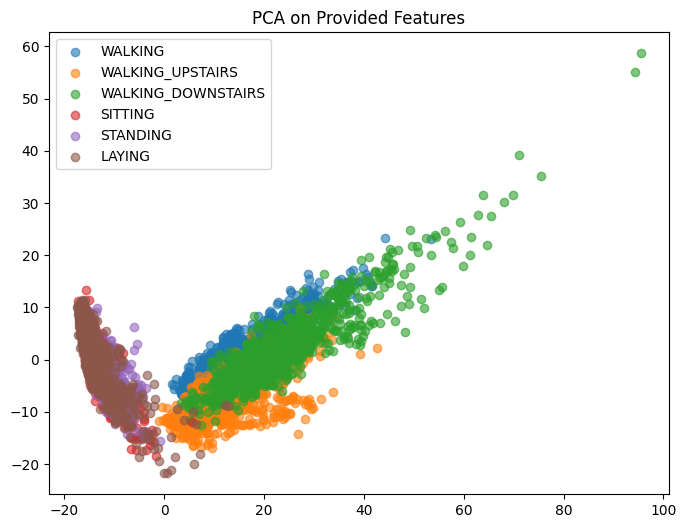

In [8]:
from sklearn.decomposition import PCA

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PCA → 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(8,6))
for act_id in np.unique(y_train):
    plt.scatter(X_pca[y_train==act_id,0], X_pca[y_train==act_id,1],
                label=activity_labels[act_id], alpha=0.6)
plt.legend()
plt.title("PCA on Provided Features")
plt.show()


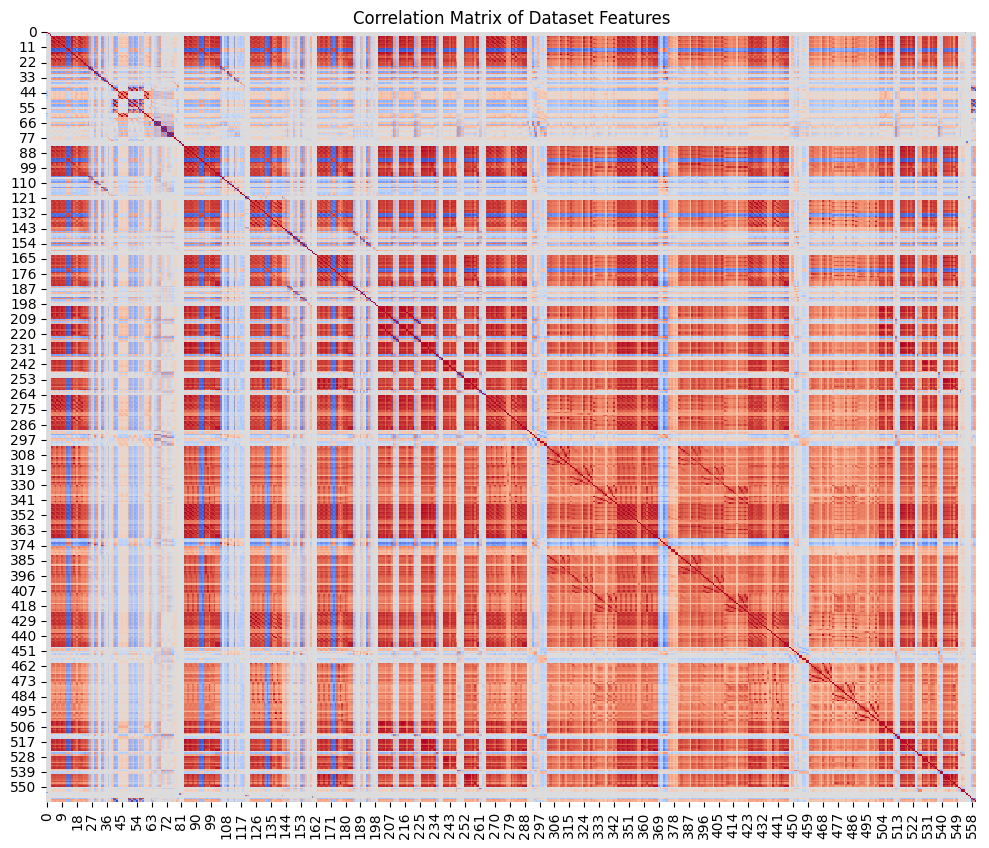

In [9]:
corr = pd.DataFrame(X_train).corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap="coolwarm", cbar=False)
plt.title("Correlation Matrix of Dataset Features")
plt.show()


In [10]:
clf = DecisionTreeClassifier(max_depth=6, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8544282321004412
Precision: 0.8570552273054951
Recall: 0.8494748529413276
Confusion Matrix:
 [[461   5  30   0   0   0]
 [ 43 343  85   0   0   0]
 [ 30  45 345   0   0   0]
 [  0   0   0 343 148   0]
 [  0   0   0  43 489   0]
 [  0   0   0   0   0 537]]


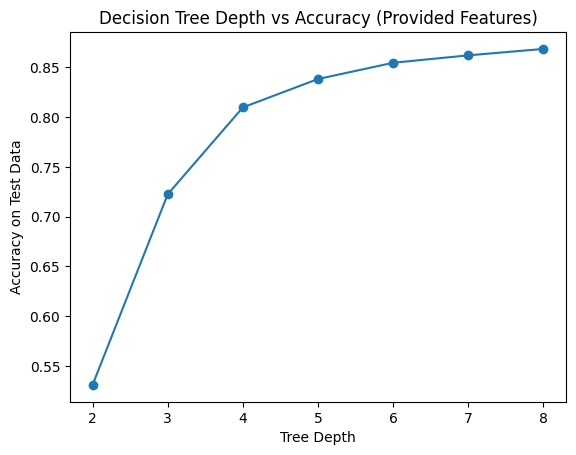

In [11]:
depths = range(2, 9)
acc_list = []

for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc_list.append(accuracy_score(y_test, y_pred))

plt.plot(depths, acc_list, marker='o')
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy on Test Data")
plt.title("Decision Tree Depth vs Accuracy (Provided Features)")
plt.show()


Decision Tree (Provided Features):
Accuracy: 0.8622
Precision: 0.8633
Recall: 0.8622


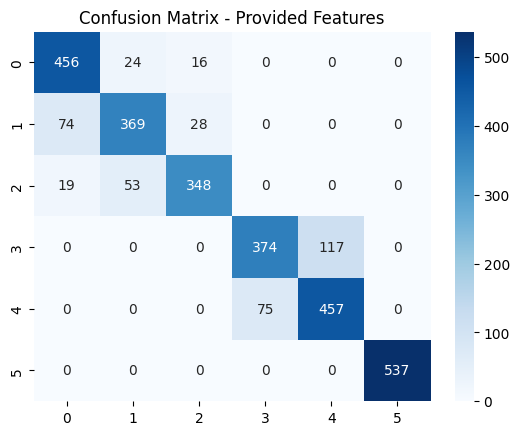

In [14]:
# [6]
# -----------------------------
# 1. Decision Tree using provided features
# -----------------------------

dt_provided = DecisionTreeClassifier(random_state=42)
dt_provided.fit(X_train, y_train)

y_pred_provided = dt_provided.predict(X_test)

acc_provided = accuracy_score(y_test, y_pred_provided)
prec_provided = precision_score(y_test, y_pred_provided, average='weighted')
rec_provided = recall_score(y_test, y_pred_provided, average='weighted')
cm_provided = confusion_matrix(y_test, y_pred_provided)

print("Decision Tree (Provided Features):")
print(f"Accuracy: {acc_provided:.4f}")
print(f"Precision: {prec_provided:.4f}")
print(f"Recall: {rec_provided:.4f}")

sns.heatmap(cm_provided, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Provided Features")
plt.show()


<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:20: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:20: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-1599301323.py:16: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+', header=None)
/tmp/ipython-input-1599301323.py:20: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+', header=None)


Raw accelerometer shape: (7352, 384) (2947, 384)
Decision Tree (Raw Accelerometer Data):
Accuracy: 0.7058
Precision: 0.7065
Recall: 0.7058


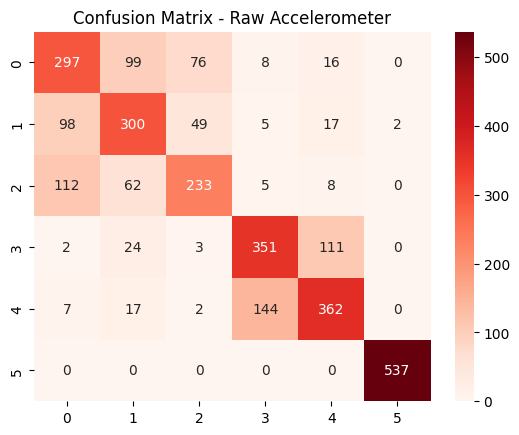

In [15]:
# [7]
# -----------------------------
# 2. Decision Tree using raw accelerometer data
# -----------------------------
# Load raw signals (accelerometer only, total_acc_x, y, z)
# Each file = (samples, 128 readings per window)

import os

signal_types = ["total_acc_x", "total_acc_y", "total_acc_z"]
X_train_raw, X_test_raw = [], []

for signal in signal_types:
    X_train_raw.append(
        pd.read_csv(f"/content/drive/MyDrive/UCL/train/Inertial Signals/{signal}_train.txt",
                    sep='\s+', header=None)
    )
    X_test_raw.append(
        pd.read_csv(f"/content/drive/MyDrive/UCL/test/Inertial Signals/{signal}_test.txt",
                    sep='\s+', header=None)
    )

# Concatenate all 3 axes
X_train_raw = pd.concat(X_train_raw, axis=1)
X_test_raw = pd.concat(X_test_raw, axis=1)

print("Raw accelerometer shape:", X_train_raw.shape, X_test_raw.shape)

# Train Decision Tree
dt_raw = DecisionTreeClassifier(random_state=42)
dt_raw.fit(X_train_raw, y_train)
y_pred_raw = dt_raw.predict(X_test_raw)

acc_raw = accuracy_score(y_test, y_pred_raw)
prec_raw = precision_score(y_test, y_pred_raw, average='weighted')
rec_raw = recall_score(y_test, y_pred_raw, average='weighted')
cm_raw = confusion_matrix(y_test, y_pred_raw)

print("Decision Tree (Raw Accelerometer Data):")
print(f"Accuracy: {acc_raw:.4f}")
print(f"Precision: {prec_raw:.4f}")
print(f"Recall: {rec_raw:.4f}")

sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Reds')
plt.title("Confusion Matrix - Raw Accelerometer")
plt.show()


In [16]:
# [8] Load raw inertial signals (example for one axis)
# These files are in train/Inertial Signals/ and test/Inertial Signals/

# Example: Body acceleration in X direction
acc_x_train = pd.read_csv('/content/drive/MyDrive/UCL/train/Inertial Signals/body_acc_x_train.txt',
                          sep='\s+', header=None)
acc_x_test = pd.read_csv('/content/drive/MyDrive/UCL/test/Inertial Signals/body_acc_x_test.txt',
                         sep='\s+', header=None)

print("acc_x_train shape:", acc_x_train.shape)  # (7352, 128)
print("acc_x_test shape:", acc_x_test.shape)    # (2947, 128)


<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-2891774173.py:6: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+', header=None)
/tmp/ipython-input-2891774173.py:8: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+', header=None)


acc_x_train shape: (7352, 128)
acc_x_test shape: (2947, 128)


In [17]:
import pandas as pd

# Each row = 1 sample, each column = 1 timestep
acc_train_x = pd.read_csv('/content/drive/MyDrive/UCL/train/Inertial Signals/body_acc_x_train.txt', sep='\s+', header=None)
acc_train_y = pd.read_csv('/content/drive/MyDrive/UCL/train/Inertial Signals/body_acc_y_train.txt', sep='\s+', header=None)
acc_train_z = pd.read_csv('/content/drive/MyDrive/UCL/train/Inertial Signals/body_acc_z_train.txt', sep='\s+', header=None)

acc_test_x = pd.read_csv('/content/drive/MyDrive/UCL/test/Inertial Signals/body_acc_x_test.txt', sep='\s+', header=None)
acc_test_y = pd.read_csv('/content/drive/MyDrive/UCL/test/Inertial Signals/body_acc_y_test.txt', sep='\s+', header=None)
acc_test_z = pd.read_csv('/content/drive/MyDrive/UCL/test/Inertial Signals/body_acc_z_test.txt', sep='\s+', header=None)


<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-1362513668.py:4: SyntaxWarning: invalid escape sequence '\s'
  acc_train_x = pd.read_csv('/content/drive/MyDrive/UCL/train/Inertial Signals/body_acc_x_train.txt', sep='\s+', header=None)
/tmp/ipython-input-1362513668.py:5: SyntaxWarning: invalid escape sequence '\s'
  acc_train_y = pd.read_csv('/content/drive/MyDrive/UCL/train/Inertial Signals/body_acc_y_train.txt', sep='\s+',

In [18]:
import pandas as pd

train_path = '/content/drive/MyDrive/UCL/train/Inertial Signals/'
test_path  = '/content/drive/MyDrive/UCL/test/Inertial Signals/'

axes = ['body_acc_x', 'body_acc_y', 'body_acc_z']

# Load all axes
acc_train = [pd.read_csv(f'{train_path}/{ax}_train.txt', sep='\s+', header=None) for ax in axes]
acc_test  = [pd.read_csv(f'{test_path}/{ax}_test.txt', sep='\s+', header=None) for ax in axes]

print("Training shapes:", [df.shape for df in acc_train])
print("Testing shapes:", [df.shape for df in acc_test])

#


<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-3502304345.py:9: SyntaxWarning: invalid escape sequence '\s'
  acc_train = [pd.read_csv(f'{train_path}/{ax}_train.txt', sep='\s+', header=None) for ax in axes]
/tmp/ipython-input-3502304345.py:10: SyntaxWarning: invalid escape sequence '\s'
  acc_test  = [pd.read_csv(f'{test_path}/{ax}_test.txt', sep='\s+', header=None) for ax in axes]


Training shapes: [(7352, 128), (7352, 128), (7352, 128)]
Testing shapes: [(2947, 128), (2947, 128), (2947, 128)]


In [28]:
import tsfel
cfg = tsfel.get_features_by_domain("temporal")


In [29]:
from joblib import Parallel, delayed

# Function to extract features from one sample
def extract_one_sample(row):
    return tsfel.time_series_features_extractor(cfg, row.values, fs=50)

# Function to extract features for one axis in parallel
def extract_axis_features(df):
    results = Parallel(n_jobs=-1)(delayed(extract_one_sample)(df.iloc[i]) for i in range(len(df)))
    return pd.concat(results, ignore_index=True)

# Function to extract features for all axes in parallel
def extract_all_axes(acc_list):
    # Parallelize over axes
    axis_features = Parallel(n_jobs=len(acc_list))(delayed(extract_axis_features)(df) for df in acc_list)
    # Concatenate all axes features
    X_feats = pd.concat(axis_features, axis=1)
    # Remove duplicate columns if any
    X_feats = X_feats.loc[:, ~X_feats.columns.duplicated()]
    return X_feats


In [30]:
# Training features
X_train_feats = extract_all_axes(acc_train)

# Testing features
X_test_feats = extract_all_axes(acc_test)

print("Feature shapes:", X_train_feats.shape, X_test_feats.shape)


Feature shapes: (7352, 14) (2947, 14)


In [31]:
# Train Decision Tree on TSFEL features
dt_tsfel = DecisionTreeClassifier(random_state=42)
dt_tsfel.fit(X_train_feats, y_train)

# Predictions
y_pred_tsfel = dt_tsfel.predict(X_test_feats)

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred_tsfel))
print("Precision:", precision_score(y_test, y_pred_tsfel, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_tsfel, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tsfel))


Accuracy: 0.5761791652527994
Precision: 0.5819013576466646
Recall: 0.5761791652527994
Confusion Matrix:
 [[423  45  28   0   0   0]
 [130 310  31   0   0   0]
 [ 45  96 279   0   0   0]
 [  0   0   0 185 194 112]
 [  0   0   0 179 236 117]
 [  0   0   0 165 107 265]]


Classification Report (TSFEL features):

              precision    recall  f1-score   support

           1       0.71      0.85      0.77       496
           2       0.69      0.66      0.67       471
           3       0.83      0.66      0.74       420
           4       0.35      0.38      0.36       491
           5       0.44      0.44      0.44       532
           6       0.54      0.49      0.51       537

    accuracy                           0.58      2947
   macro avg       0.59      0.58      0.58      2947
weighted avg       0.58      0.58      0.58      2947

Confusion Matrix (TSFEL features):



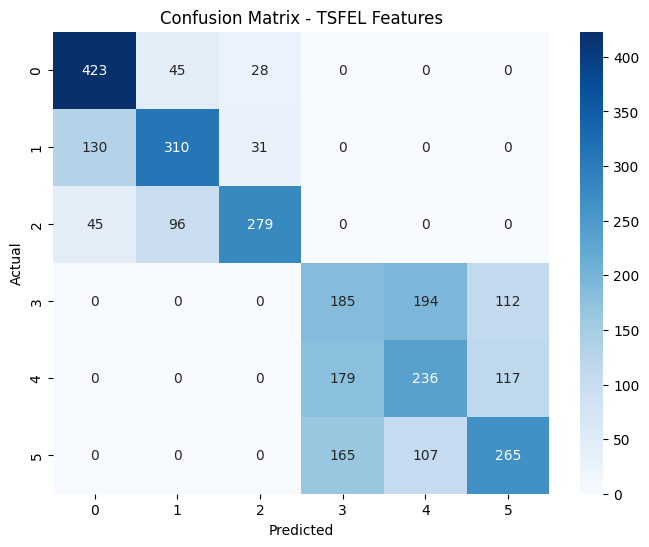

In [33]:
# Confusion matrix, precision, recall
from sklearn.metrics import classification_report

y_pred_tsfel = dt_tsfel.predict(X_test_feats)

print("Classification Report (TSFEL features):\n")
print(classification_report(y_test, y_pred_tsfel))

print("Confusion Matrix (TSFEL features):\n")
cm = confusion_matrix(y_test, y_pred_tsfel)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - TSFEL Features')
plt.show()


In [38]:
def apply_pca(X_train, X_test, n_components=50):
    """
    Apply PCA to dataset X and return reduced train/test features.
    """
    pca = PCA(n_components=n_components, random_state=42)
    X_train_reduced = pca.fit_transform(X_train)
    X_test_reduced = pca.transform(X_test)
    print(f"Explained variance ratio (first {n_components} comps): {np.sum(pca.explained_variance_ratio_):.2f}")
    return X_train_reduced, X_test_reduced

In [39]:
def train_and_evaluate(X_train, X_test, y_train, y_test, description="Model"):
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    cm = confusion_matrix(y_test, y_pred)

    print(f"\n===== {description} =====")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))

    return acc, prec, rec

In [40]:
def depth_vs_accuracy(X_train, X_test, y_train, y_test, description="Model"):
    depths = range(2, 9)
    scores = []

    for d in depths:
        clf = DecisionTreeClassifier(max_depth=d, random_state=42)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        scores.append(accuracy_score(y_test, y_pred))

    plt.plot(depths, scores, marker='o', label=description)

Explained variance ratio (first 50 comps): 0.97

===== Raw Accelerometer + PCA =====
Accuracy: 0.7411
Precision: 0.7437
Recall: 0.7411
Confusion Matrix:
 [[287 133  62   7   7   0]
 [111 282  49  24   5   0]
 [ 50  58 294   8  10   0]
 [  2  19   1 381  88   0]
 [  5  16   0  91 420   0]
 [ 15   0   0   1   1 520]]
Classification Report:
               precision    recall  f1-score   support

           1       0.61      0.58      0.59       496
           2       0.56      0.60      0.58       471
           3       0.72      0.70      0.71       420
           4       0.74      0.78      0.76       491
           5       0.79      0.79      0.79       532
           6       1.00      0.97      0.98       537

    accuracy                           0.74      2947
   macro avg       0.74      0.74      0.74      2947
weighted avg       0.74      0.74      0.74      2947


===== TSFEL Features =====
Accuracy: 0.5762
Precision: 0.5819
Recall: 0.5762
Confusion Matrix:
 [[423  45  28   0  

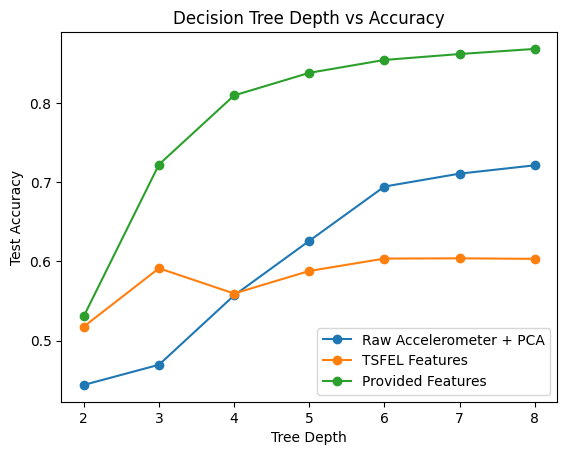

In [41]:
# 1. Raw Accelerometer (PCA)
X_train_raw_pca, X_test_raw_pca = apply_pca(X_train_raw, X_test_raw, n_components=50)
train_and_evaluate(X_train_raw_pca, X_test_raw_pca, y_train, y_test, "Raw Accelerometer + PCA")
depth_vs_accuracy(X_train_raw_pca, X_test_raw_pca, y_train, y_test, "Raw Accelerometer + PCA")

# 2. TSFEL Features
train_and_evaluate(X_train_feats, X_test_feats, y_train, y_test, "TSFEL Features")
depth_vs_accuracy(X_train_feats, X_test_feats, y_train, y_test, "TSFEL Features")

# 3. Provided Features
train_and_evaluate(X_train, X_test, y_train, y_test, "Provided Features")
depth_vs_accuracy(X_train, X_test, y_train, y_test, "Provided Features")

# Final plot
plt.xlabel("Tree Depth")
plt.ylabel("Test Accuracy")
plt.title("Decision Tree Depth vs Accuracy")
plt.legend()
plt.show()